# Navigation Project

--- 

In this notebook, we will train a DQN agent to solve the Unity ML-Agents Banana Navigation environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from src.agent import DQNAgent
from src.config import Config
from src.env_adapter import UnityAdapter

%matplotlib inline

### 1. Start the Environment and Agent

We begin by importing necessary packages and initializing the environment and the agent.

In [2]:
# Initialize Config
config = Config()

# Initialize Environment
# Ensure 'Banana.app' is correctly located. 
# If running on a different OS, change the file_name parameter.
env = UnityAdapter(file_name="Banana.app", no_graphics=True, seed=config.SEED, worker_id=1)

# Initialize Agent
agent = DQNAgent(state_size=config.STATE_SIZE, action_size=config.ACTION_SIZE, seed=config.SEED, config=config)

Mono path[0] = '/Users/profenghasn/Documents/RL Projects/Multiagent_Based_RL_G/Navigation_Project1/Banana.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/profenghasn/Documents/RL Projects/Multiagent_Based_RL_G/Navigation_Project1/Banana.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Train the Agent

Run the code cell below to train the agent from scratch.

In [3]:
def train(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Args:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    print(f"Training started with device: {torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')}")
    
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAvg Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAvg Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAvg Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = train()

Training started with device: cpu


Episode 1	Avg Score: 0.00

Episode 2	Avg Score: 1.00

Episode 3	Avg Score: 0.67

Episode 4	Avg Score: 0.75

Episode 5	Avg Score: 0.40

Episode 6	Avg Score: 0.83

Episode 7	Avg Score: 0.71

Episode 8	Avg Score: 0.62

Episode 9	Avg Score: 0.56

Episode 10	Avg Score: 0.60

Episode 11	Avg Score: 0.45

Episode 12	Avg Score: 0.50

Episode 13	Avg Score: 0.54

Episode 14	Avg Score: 0.43

Episode 15	Avg Score: 0.47

Episode 16	Avg Score: 0.38

Episode 17	Avg Score: 0.41

Episode 18	Avg Score: 0.44

Episode 19	Avg Score: 0.37

Episode 20	Avg Score: 0.30

Episode 21	Avg Score: 0.24

Episode 22	Avg Score: 0.23

Episode 23	Avg Score: 0.35

Episode 24	Avg Score: 0.29

Episode 25	Avg Score: 0.28

Episode 26	Avg Score: 0.23

Episode 27	Avg Score: 0.19

Episode 28	Avg Score: 0.14

Episode 29	Avg Score: 0.17

Episode 30	Avg Score: 0.17

Episode 31	Avg Score: 0.16

Episode 32	Avg Score: 0.16

Episode 33	Avg Score: 0.15

Episode 34	Avg Score: 0.15

Episode 35	Avg Score: 0.14

Episode 36	Avg Score: 0.08

Episode 37	Avg Score: 0.05

Episode 38	Avg Score: 0.05

Episode 39	Avg Score: 0.08

Episode 40	Avg Score: 0.07

Episode 41	Avg Score: 0.07

Episode 42	Avg Score: 0.10

Episode 43	Avg Score: 0.12

Episode 44	Avg Score: 0.14

Episode 45	Avg Score: 0.13

Episode 46	Avg Score: 0.17

Episode 47	Avg Score: 0.19

Episode 48	Avg Score: 0.25

Episode 49	Avg Score: 0.31

Episode 50	Avg Score: 0.32

Episode 51	Avg Score: 0.31

Episode 52	Avg Score: 0.31

Episode 53	Avg Score: 0.38

Episode 54	Avg Score: 0.39

Episode 55	Avg Score: 0.42

Episode 56	Avg Score: 0.43

Episode 57	Avg Score: 0.42

Episode 58	Avg Score: 0.40

Episode 59	Avg Score: 0.41

Episode 60	Avg Score: 0.42

Episode 61	Avg Score: 0.43

Episode 62	Avg Score: 0.42

Episode 63	Avg Score: 0.40

Episode 64	Avg Score: 0.41

Episode 65	Avg Score: 0.43

Episode 66	Avg Score: 0.41

Episode 67	Avg Score: 0.43

Episode 68	Avg Score: 0.43

Episode 69	Avg Score: 0.42

Episode 70	Avg Score: 0.41

Episode 71	Avg Score: 0.41

Episode 72	Avg Score: 0.36

Episode 73	Avg Score: 0.37

Episode 74	Avg Score: 0.38

Episode 75	Avg Score: 0.36

Episode 76	Avg Score: 0.37

Episode 77	Avg Score: 0.38

Episode 78	Avg Score: 0.40

Episode 79	Avg Score: 0.42

Episode 80	Avg Score: 0.41

Episode 81	Avg Score: 0.41

Episode 82	Avg Score: 0.44

Episode 83	Avg Score: 0.47

Episode 84	Avg Score: 0.45

Episode 85	Avg Score: 0.45

Episode 86	Avg Score: 0.43

Episode 87	Avg Score: 0.45

Episode 88	Avg Score: 0.47

Episode 89	Avg Score: 0.44

Episode 90	Avg Score: 0.47

Episode 91	Avg Score: 0.51

Episode 92	Avg Score: 0.51

Episode 93	Avg Score: 0.53

Episode 94	Avg Score: 0.51

Episode 95	Avg Score: 0.53

Episode 96	Avg Score: 0.58

Episode 97	Avg Score: 0.58

Episode 98	Avg Score: 0.58

Episode 99	Avg Score: 0.60

Episode 100	Avg Score: 0.58


Episode 101	Avg Score: 0.61

Episode 102	Avg Score: 0.60

Episode 103	Avg Score: 0.60

Episode 104	Avg Score: 0.63

Episode 105	Avg Score: 0.65

Episode 106	Avg Score: 0.61

Episode 107	Avg Score: 0.62

Episode 108	Avg Score: 0.67

Episode 109	Avg Score: 0.70

Episode 110	Avg Score: 0.70

Episode 111	Avg Score: 0.73

Episode 112	Avg Score: 0.75

Episode 113	Avg Score: 0.79

Episode 114	Avg Score: 0.80

Episode 115	Avg Score: 0.81

Episode 116	Avg Score: 0.82

Episode 117	Avg Score: 0.85

Episode 118	Avg Score: 0.90

Episode 119	Avg Score: 0.92

Episode 120	Avg Score: 0.95

Episode 121	Avg Score: 0.97

Episode 122	Avg Score: 0.96

Episode 123	Avg Score: 0.93

Episode 124	Avg Score: 0.96

Episode 125	Avg Score: 0.97

Episode 126	Avg Score: 1.03

Episode 127	Avg Score: 1.07

Episode 128	Avg Score: 1.13

Episode 129	Avg Score: 1.18

Episode 130	Avg Score: 1.24

Episode 131	Avg Score: 1.28

Episode 132	Avg Score: 1.28

Episode 133	Avg Score: 1.29

Episode 134	Avg Score: 1.33

Episode 135	Avg Score: 1.37

Episode 136	Avg Score: 1.43

Episode 137	Avg Score: 1.46

Episode 138	Avg Score: 1.51

Episode 139	Avg Score: 1.50

Episode 140	Avg Score: 1.51

Episode 141	Avg Score: 1.56

Episode 142	Avg Score: 1.59

Episode 143	Avg Score: 1.61

Episode 144	Avg Score: 1.68

Episode 145	Avg Score: 1.73

Episode 146	Avg Score: 1.74

Episode 147	Avg Score: 1.76

Episode 148	Avg Score: 1.76

Episode 149	Avg Score: 1.78

Episode 150	Avg Score: 1.78

Episode 151	Avg Score: 1.81

Episode 152	Avg Score: 1.86

Episode 153	Avg Score: 1.88

Episode 154	Avg Score: 1.93

Episode 155	Avg Score: 1.95

Episode 156	Avg Score: 1.99

Episode 157	Avg Score: 2.02

Episode 158	Avg Score: 2.06

Episode 159	Avg Score: 2.09

Episode 160	Avg Score: 2.11

Episode 161	Avg Score: 2.13

Episode 162	Avg Score: 2.22

Episode 163	Avg Score: 2.27

Episode 164	Avg Score: 2.28

Episode 165	Avg Score: 2.31

Episode 166	Avg Score: 2.35

Episode 167	Avg Score: 2.36

Episode 168	Avg Score: 2.39

Episode 169	Avg Score: 2.45

Episode 170	Avg Score: 2.52

Episode 171	Avg Score: 2.58

Episode 172	Avg Score: 2.67

Episode 173	Avg Score: 2.74

Episode 174	Avg Score: 2.82

Episode 175	Avg Score: 2.88

Episode 176	Avg Score: 2.90

Episode 177	Avg Score: 2.94

Episode 178	Avg Score: 3.00

Episode 179	Avg Score: 3.02

Episode 180	Avg Score: 3.09

Episode 181	Avg Score: 3.14

Episode 182	Avg Score: 3.22

Episode 183	Avg Score: 3.24

Episode 184	Avg Score: 3.31

Episode 185	Avg Score: 3.34

Episode 186	Avg Score: 3.42

Episode 187	Avg Score: 3.50

Episode 188	Avg Score: 3.55

Episode 189	Avg Score: 3.63

Episode 190	Avg Score: 3.66

Episode 191	Avg Score: 3.66

Episode 192	Avg Score: 3.70

Episode 193	Avg Score: 3.76

Episode 194	Avg Score: 3.82

Episode 195	Avg Score: 3.85

Episode 196	Avg Score: 3.86

Episode 197	Avg Score: 3.92

Episode 198	Avg Score: 3.97

Episode 199	Avg Score: 3.97

Episode 200	Avg Score: 4.08


Episode 201	Avg Score: 4.12

Episode 202	Avg Score: 4.16

Episode 203	Avg Score: 4.18

Episode 204	Avg Score: 4.20

Episode 205	Avg Score: 4.29

Episode 206	Avg Score: 4.39

Episode 207	Avg Score: 4.47

Episode 208	Avg Score: 4.45

Episode 209	Avg Score: 4.50

Episode 210	Avg Score: 4.63

Episode 211	Avg Score: 4.70

Episode 212	Avg Score: 4.73

Episode 213	Avg Score: 4.74

Episode 214	Avg Score: 4.80

Episode 215	Avg Score: 4.88

Episode 216	Avg Score: 4.97

Episode 217	Avg Score: 4.99

Episode 218	Avg Score: 5.06

Episode 219	Avg Score: 5.15

Episode 220	Avg Score: 5.16

Episode 221	Avg Score: 5.23

Episode 222	Avg Score: 5.31

Episode 223	Avg Score: 5.35

Episode 224	Avg Score: 5.41

Episode 225	Avg Score: 5.47

Episode 226	Avg Score: 5.46

Episode 227	Avg Score: 5.53

Episode 228	Avg Score: 5.48

Episode 229	Avg Score: 5.48

Episode 230	Avg Score: 5.55

Episode 231	Avg Score: 5.59

Episode 232	Avg Score: 5.63

Episode 233	Avg Score: 5.68

Episode 234	Avg Score: 5.72

Episode 235	Avg Score: 5.76

Episode 236	Avg Score: 5.75

Episode 237	Avg Score: 5.76

Episode 238	Avg Score: 5.78

Episode 239	Avg Score: 5.87

Episode 240	Avg Score: 5.91

Episode 241	Avg Score: 5.94

Episode 242	Avg Score: 5.97

Episode 243	Avg Score: 6.00

Episode 244	Avg Score: 5.93

Episode 245	Avg Score: 5.89

Episode 246	Avg Score: 5.94

Episode 247	Avg Score: 5.99

Episode 248	Avg Score: 6.01

Episode 249	Avg Score: 6.05

Episode 250	Avg Score: 6.07

Episode 251	Avg Score: 6.12

Episode 252	Avg Score: 6.15

Episode 253	Avg Score: 6.18

Episode 254	Avg Score: 6.20

Episode 255	Avg Score: 6.19

Episode 256	Avg Score: 6.15

Episode 257	Avg Score: 6.20

Episode 258	Avg Score: 6.28

Episode 259	Avg Score: 6.28

Episode 260	Avg Score: 6.42

Episode 261	Avg Score: 6.47

Episode 262	Avg Score: 6.44

Episode 263	Avg Score: 6.44

Episode 264	Avg Score: 6.51

Episode 265	Avg Score: 6.54

Episode 266	Avg Score: 6.63

Episode 267	Avg Score: 6.70

Episode 268	Avg Score: 6.79

Episode 269	Avg Score: 6.81

Episode 270	Avg Score: 6.85

Episode 271	Avg Score: 6.91

Episode 272	Avg Score: 6.91

Episode 273	Avg Score: 6.90

Episode 274	Avg Score: 6.93

Episode 275	Avg Score: 6.91

Episode 276	Avg Score: 6.96

Episode 277	Avg Score: 6.99

Episode 278	Avg Score: 6.99

Episode 279	Avg Score: 7.02

Episode 280	Avg Score: 7.00

Episode 281	Avg Score: 7.07

Episode 282	Avg Score: 6.99

Episode 283	Avg Score: 7.05

Episode 284	Avg Score: 7.07

Episode 285	Avg Score: 7.14

Episode 286	Avg Score: 7.11

Episode 287	Avg Score: 7.08

Episode 288	Avg Score: 7.10

Episode 289	Avg Score: 7.14

Episode 290	Avg Score: 7.18

Episode 291	Avg Score: 7.24

Episode 292	Avg Score: 7.31

Episode 293	Avg Score: 7.33

Episode 294	Avg Score: 7.36

Episode 295	Avg Score: 7.39

Episode 296	Avg Score: 7.44

Episode 297	Avg Score: 7.44

Episode 298	Avg Score: 7.41

Episode 299	Avg Score: 7.50

Episode 300	Avg Score: 7.46


Episode 301	Avg Score: 7.44

Episode 302	Avg Score: 7.51

Episode 303	Avg Score: 7.58

Episode 304	Avg Score: 7.54

Episode 305	Avg Score: 7.51

Episode 306	Avg Score: 7.48

Episode 307	Avg Score: 7.51

Episode 308	Avg Score: 7.55

Episode 309	Avg Score: 7.52

Episode 310	Avg Score: 7.52

Episode 311	Avg Score: 7.55

Episode 312	Avg Score: 7.60

Episode 313	Avg Score: 7.68

Episode 314	Avg Score: 7.73

Episode 315	Avg Score: 7.72

Episode 316	Avg Score: 7.66

Episode 317	Avg Score: 7.74

Episode 318	Avg Score: 7.75

Episode 319	Avg Score: 7.78

Episode 320	Avg Score: 7.88

Episode 321	Avg Score: 7.93

Episode 322	Avg Score: 7.91

Episode 323	Avg Score: 8.03

Episode 324	Avg Score: 8.06

Episode 325	Avg Score: 8.13

Episode 326	Avg Score: 8.14

Episode 327	Avg Score: 8.14

Episode 328	Avg Score: 8.22

Episode 329	Avg Score: 8.28

Episode 330	Avg Score: 8.31

Episode 331	Avg Score: 8.39

Episode 332	Avg Score: 8.51

Episode 333	Avg Score: 8.56

Episode 334	Avg Score: 8.57

Episode 335	Avg Score: 8.59

Episode 336	Avg Score: 8.70

Episode 337	Avg Score: 8.73

Episode 338	Avg Score: 8.79

Episode 339	Avg Score: 8.79

Episode 340	Avg Score: 8.81

Episode 341	Avg Score: 8.80

Episode 342	Avg Score: 8.83

Episode 343	Avg Score: 8.94

Episode 344	Avg Score: 9.10

Episode 345	Avg Score: 9.23

Episode 346	Avg Score: 9.31

Episode 347	Avg Score: 9.42

Episode 348	Avg Score: 9.42

Episode 349	Avg Score: 9.46

Episode 350	Avg Score: 9.52

Episode 351	Avg Score: 9.61

Episode 352	Avg Score: 9.59

Episode 353	Avg Score: 9.63

Episode 354	Avg Score: 9.68

Episode 355	Avg Score: 9.67

Episode 356	Avg Score: 9.74

Episode 357	Avg Score: 9.76

Episode 358	Avg Score: 9.73

Episode 359	Avg Score: 9.76

Episode 360	Avg Score: 9.67

Episode 361	Avg Score: 9.74

Episode 362	Avg Score: 9.77

Episode 363	Avg Score: 9.80

Episode 364	Avg Score: 9.80

Episode 365	Avg Score: 9.83

Episode 366	Avg Score: 9.89

Episode 367	Avg Score: 9.91

Episode 368	Avg Score: 9.96

Episode 369	Avg Score: 10.01

Episode 370	Avg Score: 10.01

Episode 371	Avg Score: 10.01

Episode 372	Avg Score: 10.06

Episode 373	Avg Score: 10.15

Episode 374	Avg Score: 10.14

Episode 375	Avg Score: 10.26

Episode 376	Avg Score: 10.29

Episode 377	Avg Score: 10.34

Episode 378	Avg Score: 10.36

Episode 379	Avg Score: 10.41

Episode 380	Avg Score: 10.57

Episode 381	Avg Score: 10.53

Episode 382	Avg Score: 10.56

Episode 383	Avg Score: 10.60

Episode 384	Avg Score: 10.60

Episode 385	Avg Score: 10.67

Episode 386	Avg Score: 10.71

Episode 387	Avg Score: 10.66

Episode 388	Avg Score: 10.66

Episode 389	Avg Score: 10.71

Episode 390	Avg Score: 10.75

Episode 391	Avg Score: 10.78

Episode 392	Avg Score: 10.79

Episode 393	Avg Score: 10.80

Episode 394	Avg Score: 10.86

Episode 395	Avg Score: 10.94

Episode 396	Avg Score: 10.97

Episode 397	Avg Score: 11.06

Episode 398	Avg Score: 11.12

Episode 399	Avg Score: 11.21

Episode 400	Avg Score: 11.24


Episode 401	Avg Score: 11.35

Episode 402	Avg Score: 11.29

Episode 403	Avg Score: 11.29

Episode 404	Avg Score: 11.43

Episode 405	Avg Score: 11.44

Episode 406	Avg Score: 11.52

Episode 407	Avg Score: 11.50

Episode 408	Avg Score: 11.58

Episode 409	Avg Score: 11.68

Episode 410	Avg Score: 11.66

Episode 411	Avg Score: 11.63

Episode 412	Avg Score: 11.64

Episode 413	Avg Score: 11.62

Episode 414	Avg Score: 11.56

Episode 415	Avg Score: 11.53

Episode 416	Avg Score: 11.60

Episode 417	Avg Score: 11.60

Episode 418	Avg Score: 11.55

Episode 419	Avg Score: 11.60

Episode 420	Avg Score: 11.61

Episode 421	Avg Score: 11.54

Episode 422	Avg Score: 11.62

Episode 423	Avg Score: 11.58

Episode 424	Avg Score: 11.62

Episode 425	Avg Score: 11.61

Episode 426	Avg Score: 11.65

Episode 427	Avg Score: 11.68

Episode 428	Avg Score: 11.69

Episode 429	Avg Score: 11.69

Episode 430	Avg Score: 11.66

Episode 431	Avg Score: 11.62

Episode 432	Avg Score: 11.57

Episode 433	Avg Score: 11.57

Episode 434	Avg Score: 11.53

Episode 435	Avg Score: 11.57

Episode 436	Avg Score: 11.53

Episode 437	Avg Score: 11.63

Episode 438	Avg Score: 11.64

Episode 439	Avg Score: 11.70

Episode 440	Avg Score: 11.69

Episode 441	Avg Score: 11.79

Episode 442	Avg Score: 11.83

Episode 443	Avg Score: 11.80

Episode 444	Avg Score: 11.81

Episode 445	Avg Score: 11.79

Episode 446	Avg Score: 11.69

Episode 447	Avg Score: 11.66

Episode 448	Avg Score: 11.67

Episode 449	Avg Score: 11.61

Episode 450	Avg Score: 11.64

Episode 451	Avg Score: 11.61

Episode 452	Avg Score: 11.69

Episode 453	Avg Score: 11.73

Episode 454	Avg Score: 11.70

Episode 455	Avg Score: 11.80

Episode 456	Avg Score: 11.83

Episode 457	Avg Score: 11.89

Episode 458	Avg Score: 11.95

Episode 459	Avg Score: 11.97

Episode 460	Avg Score: 12.04

Episode 461	Avg Score: 12.05

Episode 462	Avg Score: 12.08

Episode 463	Avg Score: 12.15

Episode 464	Avg Score: 12.15

Episode 465	Avg Score: 12.11

Episode 466	Avg Score: 12.08

Episode 467	Avg Score: 12.08

Episode 468	Avg Score: 12.05

Episode 469	Avg Score: 12.10

Episode 470	Avg Score: 12.15

Episode 471	Avg Score: 12.17

Episode 472	Avg Score: 12.18

Episode 473	Avg Score: 12.19

Episode 474	Avg Score: 12.17

Episode 475	Avg Score: 12.17

Episode 476	Avg Score: 12.22

Episode 477	Avg Score: 12.29

Episode 478	Avg Score: 12.34

Episode 479	Avg Score: 12.35

Episode 480	Avg Score: 12.28

Episode 481	Avg Score: 12.33

Episode 482	Avg Score: 12.44

Episode 483	Avg Score: 12.49

Episode 484	Avg Score: 12.58

Episode 485	Avg Score: 12.54

Episode 486	Avg Score: 12.62

Episode 487	Avg Score: 12.72

Episode 488	Avg Score: 12.84

Episode 489	Avg Score: 12.80

Episode 490	Avg Score: 12.82

Episode 491	Avg Score: 12.89

Episode 492	Avg Score: 12.85

Episode 493	Avg Score: 12.88

Episode 494	Avg Score: 12.89

Episode 495	Avg Score: 12.91

Episode 496	Avg Score: 12.91

Episode 497	Avg Score: 12.81

Episode 498	Avg Score: 12.87

Episode 499	Avg Score: 12.82

Episode 500	Avg Score: 12.80


Episode 501	Avg Score: 12.79

Episode 502	Avg Score: 12.89

Episode 503	Avg Score: 12.94

Episode 504	Avg Score: 12.91

Episode 505	Avg Score: 13.01
Environment solved in 405 episodes!	Avg Score: 13.01


### 3. Plot the Scores

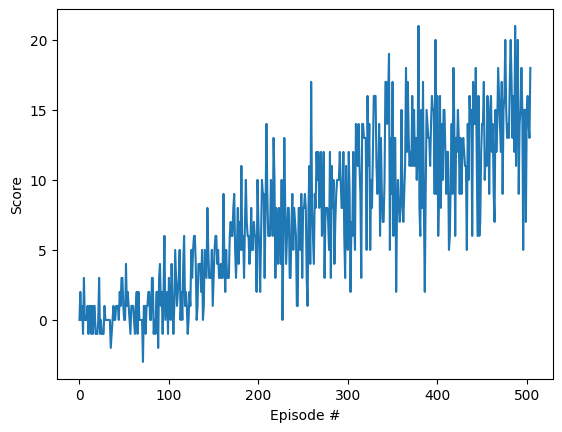

In [4]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Close the Environment

In [5]:
env.close()